# BLS data - target Salaries 
Can you make a function that takes a single specialty_id and an arbitrary number of location_ids and generates a target salary for a person?  [Slice data](https://docs.google.com/spreadsheets/d/1fWH20qjXleUB3qrRS412L4suDXYIPIV9-YX8V5px0pU/edit?usp=sharing)

## Exploration of Burea of Labor Statistics

In [30]:
import pandas as pd
import numpy as np
from IPython.display import display

df_location = pd.read_csv('location.tsv',delimiter='\t', header=0)
df_estimate = pd.read_csv('estimate.tsv',delimiter='\t', header=0)
df_specialty = pd.read_csv('specialty.tsv',delimiter='\t', header=0)

df_estimate = df_estimate.drop(['Unnamed: 0'], axis=1).replace(0, np.nan)
df_location = df_location.drop(['Unnamed: 0'], axis=1)
df_specialty = df_specialty.drop(['Unnamed: 0'], axis=1)

print('Location')
display(df_location.head())
print('Estimate')
display(df_estimate.head())
print('Specialty')
display(df_specialty.head())

Location


,location_id,city,state,zipcode,lat,lng
0,83,Dallas,TX,NaN,32.776664,-96.796988
1,225,Miami,FL,NaN,25.761680,-80.191790
2,249,Newark,NJ,NaN,40.735657,-74.172367
3,283,Philadelphia,PA,NaN,39.952584,-75.165222
4,392,Washington,DC,NaN,38.907192,-77.036871


Estimate


,specialty_id,location_id,earnings_mean,earnings_p10,earnings_p25,earnings_p50,earnings_p75,earnings_p90
0,1,41,131420,58320,80380,114840,162930.0,NaN
1,1,65,114660,45110,66690,98910,142950.0,NaN
2,1,83,127130,52940,75450,110390,158960.0,NaN
3,1,88,134680,60990,85120,119710,165360.0,NaN
4,1,92,115690,49150,71730,102840,142900.0,NaN


Specialty


,specialty_id,soc_code,name
0,1,11-0000,Management Occupations
1,2,11-1000,Top Executives
2,3,11-1010,Executives
3,4,11-1011,Chief Executives
4,1423,11-1012,Founders and Business Owners


#### Summary

In [5]:
print('Location')
display(df_location.describe())
print('Estimate')
display(df_estimate.describe())
print('Specialty')
display(df_specialty.describe())

Location


,location_id,zipcode,lat,lng
count,30.000000,2.000000,30.000000,30.000000
mean,22933.233333,18774.000000,38.408282,-93.530613
std,23357.241504,1462.296823,5.858357,19.462295
min,41.000000,17740.000000,25.761680,-122.444291
25%,274.000000,18257.000000,33.889528,-118.123931
50%,21511.000000,18774.000000,39.842787,-85.403056
75%,40698.250000,19291.000000,42.250547,-77.101295
max,80121.000000,19808.000000,47.610377,-71.058880


Estimate


,specialty_id,location_id,earnings_mean,earnings_p10,earnings_p25,earnings_p50,earnings_p75,earnings_p90
count,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,20157.000000,19870.000000,19069.000000
mean,673.647715,22948.480577,59245.786079,34086.822444,42844.899539,55649.155628,69805.776044,82051.299491
std,395.986403,23144.750126,30128.972164,16174.396858,21279.614362,28498.057625,34040.021247,37226.691853
min,1.000000,41.000000,18630.000000,15840.000000,16670.000000,17970.000000,18980.000000,19430.000000
25%,335.000000,271.000000,36430.000000,21200.000000,26410.000000,34020.000000,43380.000000,52300.000000
50%,647.000000,21497.000000,51830.000000,29570.000000,37260.000000,48980.000000,61505.000000,74860.000000
75%,1019.000000,40712.000000,74790.000000,42060.000000,54090.000000,70700.000000,90350.000000,103900.000000
max,1394.000000,80121.000000,198690.000000,175590.000000,177100.000000,187110.000000,187060.000000,186940.000000


Specialty


,specialty_id
count,1431.00000
mean,716.00000
std,413.23843
min,1.00000
25%,358.50000
50%,716.00000
75%,1073.50000
max,1431.00000


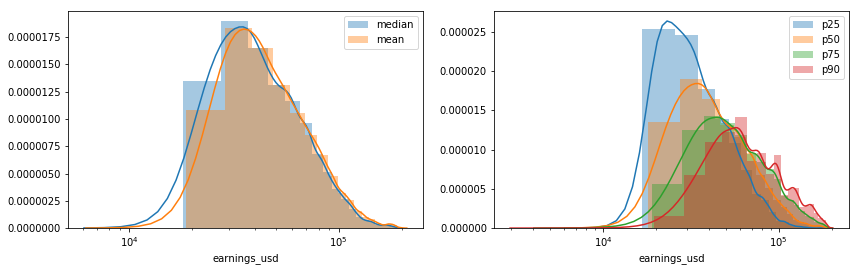

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df_estimate.earnings_p50.dropna(), bins=18, ax=ax1, label='median')
sns.distplot(df_estimate.earnings_mean.dropna(), bins=18, ax=ax1, label='mean')
ax1.set(xlabel='earnings_usd', xscale='log')
ax1.legend()

sns.distplot(df_estimate.earnings_p25.dropna(), bins=18, ax=ax2, label='p25')
sns.distplot(df_estimate.earnings_p50.dropna(), bins=18, ax=ax2, label='p50')
sns.distplot(df_estimate.earnings_p75.dropna(), bins=18, ax=ax2, label='p75')
sns.distplot(df_estimate.earnings_p90.dropna(), bins=18, ax=ax2, label='p90')
ax2.set(xlabel='earnings_usd', xscale='log')
ax2.legend()

### Implementing the target salary calculator
target_salary = f(specialty_id, location_ids...) 
Given a specialty_id and one or more location_ids, a simple implementation would be to calculate the max value seen within the associated sample. Let's begin with that implementation. A better implementation might be to regress onto a mean and standard deviation within the log space (graphed above).  

In [70]:
import numpy as np

class SalaryCalculator:
    
    def __init__(self, df_estimate):
        assert isinstance(type(df_estimate), type(pd.DataFrame))
        self._df_estimate = df_estimate
        specialty_ids = [x for x in df_estimate.specialty_id.values]   
        national_max = dict()
        for specialty_id in specialty_ids:
            query_result = self._df_estimate.loc[(df_estimate['specialty_id']==specialty_id)]
            v = max([max(query_result.earnings_p50.values), 
                     max(query_result.earnings_p75.values), 
                     max(query_result.earnings_p90.values)])
            national_max[specialty_id]=v 
            
        self._national_max = national_max
                              
    def query_specialty_id(self, specialty_id):
        return self._df_estimate.loc[(df_estimate['specialty_id']==specialty_id)]

    def query_location_id(self, location_id):                              
        return self._df_estimate.loc[(df_estimate['location_id']==location_id)]
                              
    def max_estimate(self, query_result):
        return max([max(query_result.earnings_mean.values), 
                    max(query_result.earnings_p10.values), 
                    max(query_result.earnings_p25.values), 
                    max(query_result.earnings_p50.values), 
                    max(query_result.earnings_p75.values), 
                    max(query_result.earnings_p90.values)])
        
    def calc_max_salary(self, specialty_id, query_results):
        max_salary = np.nan
        for query_result in query_results:
            if len(query_result.earnings_mean.values) != 0:
                max_salary = max(max_salary, self.max_estimate(query_result))
        
        return max_salary
        
    def generate_target_salary(self, specialty_id, location_ids):
        assert isinstance(specialty_id, int) or isinstance(specialty_id, np.int64)
        assert isinstance(location_ids, list)
        assert len(location_ids)>0
        
        query_results = [self._df_estimate.loc[(df_estimate['specialty_id']==specialty_id)&
                                               (df_estimate['location_id']==location_id)] 
                         for location_id in location_ids]
        max_salary = self.calc_max_salary(specialty_id, query_results)
        if np.isnan(max_salary):
#             print('Not found in locations, falling back to national max')
            return self._national_max.get(specialty_id)            
        else:
            return max_salary                

In [71]:
salary = SalaryCalculator(df_estimate)

In [67]:
print(salary.generate_target_salary(1,[83,225]))

Not found in locations, falling back to national max
185400.0


^^ don't have data for all (specialty_id,location_id) tuples. should fall back to national, regional stats, or pool together statistic from similar specialty. "Speciality Similarity" defined on proximity in specialty tree structure (not parsed/constructed here)

In [68]:
print(salary.generate_target_salary(1,[41, 65, 83]))

Not found in locations, falling back to national max
185400.0


In [80]:
print(salary.generate_target_salary(621,[41, 65, 83]))

118120.0


## Testing
Does our function work for all possible values? 

In [72]:
tuples = set([tuple(x) for x in df_estimate[['specialty_id', 'location_id']].values])
earnings_max = [salary.generate_target_salary(x,[y]) for x,y in tuples]

In [75]:
print(len(df_estimate))
print(len(earnings_max))

20157
20157


In [76]:
means= pd.DataFrame(earnings_max)
means.describe()

,0
count,20157.000000
mean,106074.934762
std,43305.036586
min,26130.000000
25%,69130.000000
50%,99170.000000
75%,141430.000000
max,187110.000000


In [78]:
pd.DataFrame(df_estimate.earnings_mean).describe()

,earnings_mean
count,20157.000000
mean,59245.786079
std,30128.972164
min,18630.000000
25%,36430.000000
50%,51830.000000
75%,74790.000000
max,198690.000000


### What next?
For a given specialty and set of locations, we may frame this as fitting a normal distribution, in the log space of earnings seen. 

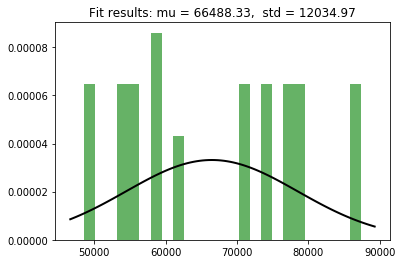

In [98]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import math 

data = df_estimate.loc[(df_estimate['specialty_id']==621)]['earnings_mean']

plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## Exploring spatial definition of neighbor specialty


In [21]:
import geopandas as gpd
import shapely.geometry

gpd_df = gpd.GeoDataFrame(df_location)
gpd_df['geometry'] = gpd_df.apply(lambda row: shapely.geometry.Point((row['lat'], row['lng'])), axis=1)
gpd_df.sindex 
pd.merge(df_estimate, df_location, left_on='location_id', right_on='location_id')

,specialty_id,location_id,earnings_mean,earnings_p10,earnings_p25,earnings_p50,earnings_p75,earnings_p90,city,state,zipcode,lat,lng,geometry
0,1,41,131420,58320,80380,114840,162930.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
1,6,41,140410,57330,77590,118330,184390.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
2,11,41,131920,61830,80990,112000,154690.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
3,13,41,141320,76930,98720,131990,171830.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
4,14,41,151920,69890,97580,137440,NaN,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
5,16,41,122440,58300,81930,112360,150370.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
6,19,41,105140,55820,71990,96940,128870.0,163950.0,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
7,21,41,148160,88350,109390,138790,173450.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
8,23,41,138210,65410,87980,121880,167430.0,NaN,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)
9,25,41,119740,71180,87420,108630,141390.0,183670.0,Boston,MA,NaN,42.360083,-71.05888,POINT (42.3600825 -71.0588801)


TODO: given location_id, find nearest neighbors. 